# Getting started
### Jupyter Notebook Shortcut:

Commenting: ctrl + '/'<br>
Run code: shift + enter<br>

### Jupyter's magic function:
https://ipython.readthedocs.io/en/stable/interactive/magics.html
* <b>%%time</b>: timing the total execution time of a cell. Can only be used in .ipynb file extension. Must removed when save script as .py

Get started by importing libraries os and pandas; abbreviate pandas as pd.

os.getcwd() function gets the current working directory where the notebook resides which is shown with the print() function.

# <a name='toc'>Table of Content</a>

<ul style='font-size:12pt;line-height:1.8em'>
    <li><a href='#4_0'>4.0 Data Validation & Analysis</a></li>
    <ul>
        <li><a href='#4_1'>4.1 Missing values & duplications</a></li>
        <li><a href='#4_2'>4.2 Groupby aggregation</a></li>
        <li><a href='#4_3'>4.3 Pivot aggregation</a></li>
        <li><a href='#4_4'>4.4 calculated field & window operations</a></li>
        <li><a href='#4_5'>4.5 Format data structure (multi-level index)</a></li>
    </ul>
    <li><a href='#5_0'>5.0 Data Visualization & Export</a></li>
    <ul>
        <li><a href='#5_1'>5.1 simple data visualization</a></li>
        <li><a href='#5_2'>5.2 export data</a></li>
    </ul>
</ul>


In [1]:
import os  #https://docs.python.org/3/library/os.html
import pandas as pd  #https://pandas.pydata.org/pandas-docs/stable/reference/
import numpy as np  #https://numpy.org/doc/stable/reference/index.html#reference
import pyodbc
# pd.options.mode.chained_assignment = None
# note: instruction written for Pandas 1.2.4

## Setting up the working directory with a class object ##
class loc:
    d0 = os.getcwd() + '\\'  #get current working directory
    d1 = d0 + 'data\\'
#     pdr = '\\\\clinisilonhh\\ifs\\PHI_Access\\PHI-CO - Data Science Share\\'
#     odr = '\\\\clinisilonhh\\ifs\\PHI_Access\\PHI-CO - System Stroke Data Crosswalk\\'
    
print(loc.d0)  #printing the current working location

C:\Users\E1724299\Desktop\Python Curriculum 2.0\


In [2]:
%%time
def print_full(x):  # Display all df columns and rows
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

def df_unique(df): #retrieve unique value from each column of a dataframe
    # https://stackoverflow.com/a/68813683
    uni = pd.Series({col:list(df[col].unique()) for col in df})
    return uni

# this function return a Series object that show the unique values in each column of a dataframe.
# df_unique(csv)

Wall time: 0 ns


# Example dataset

In [3]:
csv = pd.read_csv(loc.d1 + 'raw_data_alt.csv')
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112443 entries, 0 to 112442
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ids             112443 non-null  object 
 1   AdmitDate       112443 non-null  object 
 2   AdmitTime       112443 non-null  int64  
 3   DischargeDate   112293 non-null  object 
 4   DischargeTime   112293 non-null  float64
 5   EntityCode      112443 non-null  object 
 6   Loc1            112443 non-null  object 
 7   Loc2            86881 non-null   object 
 8   Loc3            63902 non-null   object 
 9   Loc4            31045 non-null   object 
 10  Loc5            14177 non-null   object 
 11  PtType1         112443 non-null  object 
 12  PtType2         86881 non-null   object 
 13  PtType3         63902 non-null   object 
 14  PtType4         31045 non-null   object 
 15  PtType5         14177 non-null   object 
 16  DateIn1         112443 non-null  object 
 17  DateIn2   

In [4]:
print_full(csv.head())

,ids,AdmitDate,AdmitTime,DischargeDate,DischargeTime,EntityCode,Loc1,Loc2,Loc3,Loc4,Loc5,PtType1,PtType2,PtType3,PtType4,PtType5,DateIn1,DateIn2,DateIn3,DateIn4,DateIn5,TimeIn1,TimeIn2,TimeIn3,TimeIn4,TimeIn5,EncStatus,FinancialClass,VisitType,cost
0,E0122776959240,1/1/2013,627,1/2/2013,1422.0,MC,EDMC,VUMC,VUMC,J6MB,NaN,ER,OU,IP,IP,NaN,1/1/2013,1/1/2013,1/1/2013,1/1/2013,NaN,1031,1417.0,1417.0,1525.0,NaN,Cancelled,MH - MEDICARE HMO,OP,$1.94
1,E0192437769970,1/1/2013,1507,1/1/2013,1845.0,MC,JANT,NaN,NaN,NaN,NaN,OU,NaN,NaN,NaN,NaN,1/1/2013,NaN,NaN,NaN,NaN,1244,NaN,NaN,NaN,NaN,Discharged,SP - SELF-PAY,Obs,$69.68
2,E0238210647860,1/1/2013,1353,1/2/2013,1726.0,SE,JANT,NaN,NaN,NaN,NaN,OU,NaN,NaN,NaN,NaN,1/1/2013,NaN,NaN,NaN,NaN,1637,NaN,NaN,NaN,NaN,Preadmit,HM - HMO,Obs,$75.59
3,E0295116781805,1/1/2013,625,1/2/2013,1520.0,HH,EDMC,VUMC,J7EC,NaN,NaN,ER,OU,OU,NaN,NaN,1/1/2013,1/1/2013,1/1/2013,NaN,NaN,1657,2016.0,2130.0,NaN,NaN,Active,MH - MEDICARE HMO,ED,$66.22
4,E0576457975867,1/1/2013,56,1/3/2013,1515.0,SE,EDMC,VUMC,VUMC,J7MB,NaN,ER,OU,IP,IP,NaN,1/1/2013,1/1/2013,1/1/2013,1/1/2013,NaN,1050,1551.0,1703.0,1740.0,NaN,Cancelled,MH - MEDICARE HMO,ED,$94.28


<div align='right'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>

# <a name='4_0'>4.0 Data Validation & Analysis</a>
## <a name='4_1'>4.1 Missing values & duplications</a>
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

### .isna(), .notna()
Both API/function can be applied to dataframe and series.

isna() = isnull(), notna() = notnull(). <a href='https://github.com/pandas-dev/pandas/blob/0409521665bd436a10aea7e06336066bf07ff057/pandas/core/dtypes/missing.py#L109'>Pandas Source code citation</a>

Both isna and isnull methods detect missing values. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html

Both notna and notnull methods detect non-missing values. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html

In [5]:
p41e1 = csv.isna().sum()
p41e2 = csv.notna().sum()

display(p41e1, p41e2)

ids                   0
AdmitDate             0
AdmitTime             0
DischargeDate       150
DischargeTime       150
EntityCode            0
Loc1                  0
Loc2              25562
Loc3              48541
Loc4              81398
Loc5              98266
PtType1               0
PtType2           25562
PtType3           48541
PtType4           81398
PtType5           98266
DateIn1               0
DateIn2           25562
DateIn3           48541
DateIn4           81398
DateIn5           98266
TimeIn1               0
TimeIn2           25562
TimeIn3           48541
TimeIn4           81398
TimeIn5           98266
EncStatus             0
FinancialClass        0
VisitType             0
cost                  0
dtype: int64

ids               112443
AdmitDate         112443
AdmitTime         112443
DischargeDate     112293
DischargeTime     112293
EntityCode        112443
Loc1              112443
Loc2               86881
Loc3               63902
Loc4               31045
Loc5               14177
PtType1           112443
PtType2            86881
PtType3            63902
PtType4            31045
PtType5            14177
DateIn1           112443
DateIn2            86881
DateIn3            63902
DateIn4            31045
DateIn5            14177
TimeIn1           112443
TimeIn2            86881
TimeIn3            63902
TimeIn4            31045
TimeIn5            14177
EncStatus         112443
FinancialClass    112443
VisitType         112443
cost              112443
dtype: int64

In [6]:
p41e3 = csv[csv['TimeIn2'].isna()]
# p41e3 = csv[csv['Bed1'].isna() == False]
p41e4 = csv[csv['TimeIn2'].notna()]
# p41e4 = csv[csv['Bed1'].notna() == False]

display(p41e3.info(), p41e4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25562 entries, 1 to 112431
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ids             25562 non-null  object 
 1   AdmitDate       25562 non-null  object 
 2   AdmitTime       25562 non-null  int64  
 3   DischargeDate   25513 non-null  object 
 4   DischargeTime   25513 non-null  float64
 5   EntityCode      25562 non-null  object 
 6   Loc1            25562 non-null  object 
 7   Loc2            0 non-null      object 
 8   Loc3            0 non-null      object 
 9   Loc4            0 non-null      object 
 10  Loc5            0 non-null      object 
 11  PtType1         25562 non-null  object 
 12  PtType2         0 non-null      object 
 13  PtType3         0 non-null      object 
 14  PtType4         0 non-null      object 
 15  PtType5         0 non-null      object 
 16  DateIn1         25562 non-null  object 
 17  DateIn2         0 non-null      obj

None

None

### .fillna(), .ffill(), .bfill()
Fill missing/na/nan values with a specified function. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html <br> 
Fill missing/na/nan values with the ffill method. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html <br> 
Fill missing/na/nan values with the bfill method. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html <br> 
Fill missing/na/nan values with the ffill method (similar to .ffill() method). <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pad.html

In [7]:
p41e6 = csv[['TimeIn1','TimeIn2','TimeIn3']]

display(p41e6, p41e6.fillna(0))

,TimeIn1,TimeIn2,TimeIn3
0,1031,1417.0,1417.0
1,1244,NaN,NaN
2,1637,NaN,NaN
3,1657,2016.0,2130.0
4,1050,1551.0,1703.0
...,...,...,...
112438,1247,1611.0,1744.0
112439,1536,2127.0,229.0
112440,30,500.0,1739.0
112441,618,826.0,1356.0


,TimeIn1,TimeIn2,TimeIn3
0,1031,1417.0,1417.0
1,1244,0.0,0.0
2,1637,0.0,0.0
3,1657,2016.0,2130.0
4,1050,1551.0,1703.0
...,...,...,...
112438,1247,1611.0,1744.0
112439,1536,2127.0,229.0
112440,30,500.0,1739.0
112441,618,826.0,1356.0


In [8]:
p41e6['TimeIn3_nonull'] = p41e6['TimeIn3'].fillna(0)

p41e6

<ipython-input-8-0b49e64b9d5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p41e6['TimeIn3_nonull'] = p41e6['TimeIn3'].fillna(0)


,TimeIn1,TimeIn2,TimeIn3,TimeIn3_nonull
0,1031,1417.0,1417.0,1417.0
1,1244,NaN,NaN,0.0
2,1637,NaN,NaN,0.0
3,1657,2016.0,2130.0,2130.0
4,1050,1551.0,1703.0,1703.0
...,...,...,...,...
112438,1247,1611.0,1744.0,1744.0
112439,1536,2127.0,229.0,229.0
112440,30,500.0,1739.0,1739.0
112441,618,826.0,1356.0,1356.0


In [9]:
p41e6.fillna({'TimeIn1':888,'TimeIn2':.999,'TimeIn3':'null'})

,TimeIn1,TimeIn2,TimeIn3,TimeIn3_nonull
0,1031,1417.000,1417.0,1417.0
1,1244,0.999,null,0.0
2,1637,0.999,null,0.0
3,1657,2016.000,2130.0,2130.0
4,1050,1551.000,1703.0,1703.0
...,...,...,...,...
112438,1247,1611.000,1744.0,1744.0
112439,1536,2127.000,229.0,229.0
112440,30,500.000,1739.0,1739.0
112441,618,826.000,1356.0,1356.0


In [10]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112443 entries, 0 to 112442
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ids             112443 non-null  object 
 1   AdmitDate       112443 non-null  object 
 2   AdmitTime       112443 non-null  int64  
 3   DischargeDate   112293 non-null  object 
 4   DischargeTime   112293 non-null  float64
 5   EntityCode      112443 non-null  object 
 6   Loc1            112443 non-null  object 
 7   Loc2            86881 non-null   object 
 8   Loc3            63902 non-null   object 
 9   Loc4            31045 non-null   object 
 10  Loc5            14177 non-null   object 
 11  PtType1         112443 non-null  object 
 12  PtType2         86881 non-null   object 
 13  PtType3         63902 non-null   object 
 14  PtType4         31045 non-null   object 
 15  PtType5         14177 non-null   object 
 16  DateIn1         112443 non-null  object 
 17  DateIn2   

### .dropna()
This method removes missing values from the data or object. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [11]:
p41e6 = csv.dropna(axis=0)  #drop row with at least 1 missing value
p41e7 = csv.dropna(axis=1)  #drop column with at least 1 missing value

display(p41e6, p41e7)

,ids,AdmitDate,AdmitTime,DischargeDate,DischargeTime,EntityCode,Loc1,Loc2,Loc3,Loc4,...,DateIn5,TimeIn1,TimeIn2,TimeIn3,TimeIn4,TimeIn5,EncStatus,FinancialClass,VisitType,cost
5,E0579318588523,1/1/2013,2050,1/3/2013,1500.0,HH,EDMC,VUMC,J5MA,J5MA,...,1/1/2013,1220,1937.0,2200.0,1024.0,1351.0,Cancelled,SP - SELF-PAY,DS,$11.41
13,E2401063385472,1/1/2013,946,1/4/2013,1615.0,MC,EDMC,VUMC,J5MA,J5MA,...,1/1/2013,1040,1422.0,1648.0,1105.0,1402.0,Cancelled,DT - MEDICAID TRADITIONAL,Obs,$47.70
17,E2962059711866,1/1/2013,205,1/15/2013,1446.0,MC,EDMC,VUMC,J5MA,J5MA,...,1/1/2013,2015,2240.0,14.0,1040.0,1651.0,Preadmit,MR - MEDICARE,Obs,$93.12
21,E3540049083281,1/1/2013,649,1/7/2013,1420.0,MC,EDMC,VUMC,J5MA,J5MA,...,1/1/2013,852,1459.0,1650.0,1951.0,2146.0,Active,DH - MEDICAID HMO,DS,$96.38
30,E4511342216992,1/1/2013,2135,1/5/2013,1255.0,SE,JLDR,JANT,JANT,JLDR,...,1/3/2013,2120,2120.0,2314.0,828.0,1444.0,Discharged,MH - MEDICARE HMO,Obs,$79.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112410,E9087136713769,6/30/2019,1850,7/4/2019,1900.0,HH,EDPD,VUPD,A8PH,CSC,...,7/1/2019,1025,1304.0,2051.0,2243.0,1811.0,Preadmit,SP - SELF-PAY,DS,$84.93
112419,E9088238834444,6/30/2019,626,7/8/2019,2121.0,HH,EREV,VUHH,EREV,EDHH,...,7/1/2019,1747,1747.0,1810.0,1919.0,657.0,Cancelled,CH - CHAMPUS,DS,$72.78
112424,E9088722117363,6/30/2019,834,7/2/2019,1530.0,HH,EDSE,VUSE,CCDU,CCDU,...,7/1/2019,1850,1850.0,1850.0,2325.0,1819.0,Preadmit,DH - MEDICAID HMO,ED,$46.77
112435,E9435748672227,6/30/2019,315,7/5/2019,1746.0,SE,EDHH,EREV,EDHH,S1MU,...,6/30/2019,1723,1831.0,1833.0,2201.0,1151.0,Active,BC - BLUE CROSS,DS,$24.13


,ids,AdmitDate,AdmitTime,EntityCode,Loc1,PtType1,DateIn1,TimeIn1,EncStatus,FinancialClass,VisitType,cost
0,E0122776959240,1/1/2013,627,MC,EDMC,ER,1/1/2013,1031,Cancelled,MH - MEDICARE HMO,OP,$1.94
1,E0192437769970,1/1/2013,1507,MC,JANT,OU,1/1/2013,1244,Discharged,SP - SELF-PAY,Obs,$69.68
2,E0238210647860,1/1/2013,1353,SE,JANT,OU,1/1/2013,1637,Preadmit,HM - HMO,Obs,$75.59
3,E0295116781805,1/1/2013,625,HH,EDMC,ER,1/1/2013,1657,Active,MH - MEDICARE HMO,ED,$66.22
4,E0576457975867,1/1/2013,56,SE,EDMC,ER,1/1/2013,1050,Cancelled,MH - MEDICARE HMO,ED,$94.28
...,...,...,...,...,...,...,...,...,...,...,...,...
112438,E9870946410920,6/30/2019,1329,HH,EDMC,ER,6/30/2019,1247,Discharged,HX - HEALTH INSURANCE EXCHANGE,Obs,$19.26
112439,E9875397672366,6/30/2019,2257,SE,EDMC,ER,6/30/2019,1536,Preadmit,MR - MEDICARE,Obs,$33.08
112440,E9904534873864,6/30/2019,2045,HH,EDHH,ER,6/30/2019,30,Active,MR - MEDICARE,Obs,$95.27
112441,E9927247603461,6/30/2019,1626,HH,EDMC,ER,6/30/2019,618,Discharged,DH - MEDICAID HMO,OP,$22.12


### .duplicated()
This method returns a boolean series indicating if there are duplicated rows in the data. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [12]:
# p41e5 = csv[csv['EntityCode'].duplicated()]
p41e8 = csv[csv.duplicated(subset=['EntityCode'])]
display(p41e8)

,ids,AdmitDate,AdmitTime,DischargeDate,DischargeTime,EntityCode,Loc1,Loc2,Loc3,Loc4,...,DateIn5,TimeIn1,TimeIn2,TimeIn3,TimeIn4,TimeIn5,EncStatus,FinancialClass,VisitType,cost
1,E0192437769970,1/1/2013,1507,1/1/2013,1845.0,MC,JANT,NaN,NaN,NaN,...,NaN,1244,NaN,NaN,NaN,NaN,Discharged,SP - SELF-PAY,Obs,$69.68
4,E0576457975867,1/1/2013,56,1/3/2013,1515.0,SE,EDMC,VUMC,VUMC,J7MB,...,NaN,1050,1551.0,1703.0,1740.0,NaN,Cancelled,MH - MEDICARE HMO,ED,$94.28
5,E0579318588523,1/1/2013,2050,1/3/2013,1500.0,HH,EDMC,VUMC,J5MA,J5MA,...,1/1/2013,1220,1937.0,2200.0,1024.0,1351.0,Cancelled,SP - SELF-PAY,DS,$11.41
6,E0599404356054,1/1/2013,450,1/2/2013,1816.0,MC,EDMC,VUMC,J5MA,NaN,...,NaN,246,633.0,815.0,NaN,NaN,Preadmit,MR - MEDICARE,IP,$91.60
7,E0733758165988,1/1/2013,1636,1/2/2013,1506.0,HH,EDMC,VUMC,J5MA,NaN,...,NaN,1440,2008.0,2159.0,NaN,NaN,Active,MR - MEDICARE,IP,$88.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112438,E9870946410920,6/30/2019,1329,7/3/2019,1616.0,HH,EDMC,VUMC,J7MB,NaN,...,NaN,1247,1611.0,1744.0,NaN,NaN,Discharged,HX - HEALTH INSURANCE EXCHANGE,Obs,$19.26
112439,E9875397672366,6/30/2019,2257,7/9/2019,1607.0,SE,EDMC,VUMC,J4EA,J3EA,...,7/2/2019,1536,2127.0,229.0,1827.0,1616.0,Preadmit,MR - MEDICARE,Obs,$33.08
112440,E9904534873864,6/30/2019,2045,7/3/2019,1325.0,HH,EDHH,WC5,WCAN,NaN,...,NaN,30,500.0,1739.0,NaN,NaN,Active,MR - MEDICARE,Obs,$95.27
112441,E9927247603461,6/30/2019,1626,7/2/2019,1730.0,HH,EDMC,VUMC,J4EC,NaN,...,NaN,618,826.0,1356.0,NaN,NaN,Discharged,DH - MEDICAID HMO,OP,$22.12


### .drop_duplicates() 
This method drops duplicated rows, and returns a dataframe without those repeated or duplicated rows. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [13]:
p41e9 = csv.drop_duplicates(subset=['EntityCode','Loc1','Loc2'], keep='last')

display(p41e9)

,ids,AdmitDate,AdmitTime,DischargeDate,DischargeTime,EntityCode,Loc1,Loc2,Loc3,Loc4,...,DateIn5,TimeIn1,TimeIn2,TimeIn3,TimeIn4,TimeIn5,EncStatus,FinancialClass,VisitType,cost
72,E2780433682144,1/2/2013,457,1/3/2013,1143.0,SE,JPPC,JLDR,JPPC,JPPC,...,1/3/2013,732,1220.0,1836.0,2040.0,1143.0,Preadmit,DH - MEDICAID HMO,IP,$12.14
214,E1761894661668,1/4/2013,1145,1/7/2013,1422.0,MC,J5MA,J6MA,J6MA,J6MA,...,NaN,1541,1954.0,2003.0,1422.0,NaN,Cancelled,MR - MEDICARE,IP,$67.34
364,E0278584751217,1/7/2013,809,1/7/2013,2000.0,SE,JCO,JDS2,NaN,NaN,...,NaN,1356,1358.0,NaN,NaN,NaN,Preadmit,DH - MEDICAID HMO,IP,$44.00
381,E1756575793867,1/7/2013,1031,1/11/2013,1500.0,HH,EDMC,J3EC,J3EC,J7ED,...,NaN,1803,13.0,1415.0,1519.0,NaN,Preadmit,MH - MEDICARE HMO,ED,$9.85
407,E4024710105855,1/7/2013,1721,1/7/2013,1830.0,HH,JCO,JDS2,NaN,NaN,...,NaN,1118,1318.0,NaN,NaN,NaN,Active,MH - MEDICARE HMO,Obs,$48.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112437,E9778408231460,6/30/2019,2337,7/1/2019,1447.0,MC,EDHH,VUHH,6WJP,NaN,...,NaN,2334,413.0,1246.0,NaN,NaN,Preadmit,MH - MEDICARE HMO,IP,$1.68
112439,E9875397672366,6/30/2019,2257,7/9/2019,1607.0,SE,EDMC,VUMC,J4EA,J3EA,...,7/2/2019,1536,2127.0,229.0,1827.0,1616.0,Preadmit,MR - MEDICARE,Obs,$33.08
112440,E9904534873864,6/30/2019,2045,7/3/2019,1325.0,HH,EDHH,WC5,WCAN,NaN,...,NaN,30,500.0,1739.0,NaN,NaN,Active,MR - MEDICARE,Obs,$95.27
112441,E9927247603461,6/30/2019,1626,7/2/2019,1730.0,HH,EDMC,VUMC,J4EC,NaN,...,NaN,618,826.0,1356.0,NaN,NaN,Discharged,DH - MEDICAID HMO,OP,$22.12


<div align='right'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>

## <a name='4_2'>4.2 Groupby aggregation</a>
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

### df.groupby()
This method groups a dataframe by a mapper or series of columns. <br> 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html <br> 
This method aggregates using at least one operation over a specific axis over the data. 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

https://numpy.org/doc/stable/reference/routines.statistics.html

https://pbpython.com/groupby-agg.html

https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb

In [14]:
# csv = pd.read_csv(loc.d1 + 'raw_data2.csv')
p42e1 = csv.groupby(['EntityCode','FinancialClass'])

In [15]:
# agg() come with some built-in calculation: sum, mean, max, min, unique, nunique, count
# for advance calculation use numpy function instead: np.std, np.percentile
p42e2 = p42e1.agg({'ids':'count','AdmitTime':'sum','DischargeTime':[min, max, np.std,'mean'],'Loc1':np.sum})
p42e2

ids AdmitTime DischargeTime           
                                     count       sum           min     max   
EntityCode FinancialClass                                                    
HH         BC - BLUE CROSS            5821   6982160          11.0  2356.0  \
           CH - CHAMPUS                161    186498          33.0  2247.0   
           CL - COMMERCIAL LOW BENES    78    100291         400.0  2253.0   
           CO - COMMERCIAL             114    135318          10.0  2228.0   
           DH - MEDICAID HMO          6423   7686362           5.0  2353.0   
...                                    ...       ...           ...     ...   
SE         MR - MEDICARE              3249   3875948          16.0  2359.0   
           PP - PPO                    998   1194661          30.0  2345.0   
           SP - SELF-PAY              1117   1339547          30.0  2355.0   
           WI - WORK COMP               26     28112         944.0  2210.0   
           WT - WORK COMP TWC           58     76254         453.0  2235.0   

                                                                
                                             std         mean   
EntityCode FinancialClass                                       
HH         BC - BLUE CROSS            331.957447  1506.292813  \
           CH - CHAMPUS               350.646443  1507.149068   
           CL - COMMERCIAL LOW BENES  338.447043  1495.038462   
           CO - COMMERCIAL            392.248634  1456.017544   
           DH - MEDICAID HMO          327.160530  1500.310571   
...                                          ...          ...   
SE         MR - MEDICARE              326.599678  1510.204440   
           PP - PPO                   316.575674  1524.478392   
           SP - SELF-PAY              332.846968  1502.359964   
           WI - WORK COMP             308.419943  1482.307692   
           WT - WORK COMP TWC         356.637564  1524.413793   

                                                                                   Loc1  
                                                                                    sum  
EntityCode FinancialClass                                                                
HH         BC - BLUE CROSS            EDMCEDMCJDS1PDMCJDS1JDS1ENDJ5ECJLDRJCOEDMCEDMC...  
           CH - CHAMPUS               JPACJLDRJDS1EDMCENDJLDRJANTJDS1EDMCJDS1EDMCJDS...  
           CL - COMMERCIAL LOW BENES  EDMCEDMCJLDREDMCJDS1JDS1ENDJANTEDMCJLDREDMCJDS...  
           CO - COMMERCIAL            PDMCJCOJDS2ENDJCOEDMCJDS2JLDRJLDRENDEDMCEDMCED...  
           DH - MEDICAID HMO          EDMCEDMCJDS2J5MAJDS2JCOJCOJDS2JPACJDS1JEXPJDS1...  
...                                                                                 ...  
SE         MR - MEDICARE              JANTEDMCJLDREDMCEDMCJDS1JLDREDMCEDMCEDMCEDMCEN...  
           PP - PPO                   J7EBEDMCJDS2EDMCJPPCJDS1J5MAJDS1J7EBENDEDMCJCO...  
           SP - SELF-PAY              JDS2EDMCJDS1EDMCJ7MAJPACJLDRJPACJDS2JLDRJDS1JD...  
           WI - WORK COMP             ENDJDS2JPACENDCYVUEDPDJ5ECEDHHWC5OBEDJPACJNICJ...  
           WT - WORK COMP TWC         ENDEDMCJDS1EDMCEDMCEDMCJEXPJDS2ENDJDS1J5ECEDMC...  

[77 rows x 7 columns]

In [16]:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.quantile.html

<div align='right'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>

## <a name='4_3'>4.3 Pivot aggregation</a> <br>
This method creates a spreadsheet-style pivot table, and returns it as a Dataframe. <br> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html <br> 
This method returns a reshaped DataFrame organized by given index/column names. <br> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [17]:
p43 = csv[['EntityCode','FinancialClass','ids','cost']]
p43['cost'] = p43['cost'].str.replace('$','').astype('float64')

p43e1 = pd.pivot_table(p43, index=['EntityCode','ids'], columns=['FinancialClass'], values=['cost'])
p43e1

<ipython-input-17-5e2eeac383ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p43['cost'] = p43['cost'].str.replace('$','').astype('float64')


cost                
FinancialClass            BC - BLUE CROSS CH - CHAMPUS   
EntityCode ids                                           
HH         E0000355168873             NaN          NaN  \
           E0000545786565             NaN          NaN   
           E0000582005665           87.03          NaN   
           E0000586837404             NaN          NaN   
           E0000966861678             NaN          NaN   
...                                   ...          ...   
SE         E9996941337120             NaN          NaN   
           E9999194487289             NaN          NaN   
           E9999425003156             NaN          NaN   
           E9999487178949             NaN          NaN   
           E9999972136058             NaN          NaN   

                                                                      
FinancialClass            CL - COMMERCIAL LOW BENES CO - COMMERCIAL   
EntityCode ids                                                        
HH         E0000355168873                       NaN             NaN  \
           E0000545786565                       NaN             NaN   
           E0000582005665                       NaN             NaN   
           E0000586837404                       NaN             NaN   
           E0000966861678                       NaN             NaN   
...                                             ...             ...   
SE         E9996941337120                       NaN             NaN   
           E9999194487289                       NaN             NaN   
           E9999425003156                       NaN             NaN   
           E9999487178949                       NaN             NaN   
           E9999972136058                       NaN             NaN   

                                                                      
FinancialClass            DH - MEDICAID HMO DO - MEDICAID OUT STATE   
EntityCode ids                                                        
HH         E0000355168873               NaN                     NaN  \
           E0000545786565               NaN                     NaN   
           E0000582005665               NaN                     NaN   
           E0000586837404             57.71                     NaN   
           E0000966861678               NaN                     NaN   
...                                     ...                     ...   
SE         E9996941337120               NaN                     NaN   
           E9999194487289             74.29                     NaN   
           E9999425003156               NaN                     NaN   
           E9999487178949             20.54                     NaN   
           E9999972136058               NaN                     NaN   

                                                                     
FinancialClass            DP - MEDICAID PENDING DS - MEDICAID STAR   
EntityCode ids                                                       
HH         E0000355168873                   NaN                NaN  \
           E0000545786565                   NaN                NaN   
           E0000582005665                   NaN                NaN   
           E0000586837404                   NaN                NaN   
           E0000966861678                 30.46                NaN   
...                                         ...                ...   
SE         E9996941337120                   NaN                NaN   
           E9999194487289                   NaN                NaN   
           E9999425003156                   NaN                NaN   
           E9999487178949                   NaN                NaN   
           E9999972136058                   NaN                NaN   

                                                                             
FinancialClass            DT - MEDICAID TRADITIONAL EC - MHHS EMPLOYEE COV   
EntityCode ids                                                               
HH         E0000355

In [18]:
p43e2 = p43.pivot(index=['EntityCode'], columns=['FinancialClass'], values=['cost'])
p43e2 #the value in the index must be distinct for df.pivot() to work

ValueError: Index contains duplicate entries, cannot reshape

In [19]:
# https://numpy.org/doc/stable/reference/routines.statistics.html

p43e3 = pd.pivot_table(p43, index=['FinancialClass'], columns=['EntityCode'], values=['cost'], aggfunc={'cost':[max, min, np.sum]})
p43e3

cost                                      
                                   max                  min                 
EntityCode                          HH     MC     SE     HH     MC     SE   
FinancialClass                                                              
BC - BLUE CROSS                  99.99  99.98  99.98   0.00   0.04   0.12  \
CH - CHAMPUS                     99.34  99.94  98.20   0.29   0.09   0.88   
CL - COMMERCIAL LOW BENES        99.93  99.90  89.32   1.26   1.13  14.18   
CO - COMMERCIAL                  99.49  99.53  99.94   0.73   0.30   1.07   
DH - MEDICAID HMO                99.97  99.98  99.94   0.01   0.01   0.08   
DO - MEDICAID OUT STATE          97.02  99.95  98.29   1.08   0.12   0.86   
DP - MEDICAID PENDING            99.96  99.92  99.66   0.23   0.04   0.01   
DS - MEDICAID STAR                 NaN   8.67    NaN    NaN   8.67    NaN   
DT - MEDICAID TRADITIONAL       100.00  99.95  99.28   0.03   0.00   0.37   
EC - MHHS EMPLOYEE COV           99.96  99.89  98.95   0.10   0.02   0.61   
GP - GOVT PROGRAMS               97.52  99.52  96.09   0.46   1.25   0.52   
HM - HMO                         99.98  99.95  99.92   0.05   0.01   0.05   
HX - HEALTH INSURANCE EXCHANGE   99.83  99.93  99.67   0.12   0.09   0.30   
II - INTERNATIONAL INS           92.93  99.21  94.62   0.04   4.48   4.03   
IN - INSTITUTIONAL               96.19  98.26  86.26   2.59   0.23   4.96   
IT - INTERNATIONAL SP            97.39  97.70  71.98   2.20   3.23  13.35   
L1 - GOV THIRD PRTY LIAB         99.75  99.60  97.08   0.09   0.11   0.07   
L2 - SP THIRD PRTY LIAB          99.84  99.16  97.33   0.17   0.55   1.25   
MB - MEDICARE PART B             96.33  91.98  91.91   5.43   0.71  25.22   
MH - MEDICARE HMO                99.97  99.97  99.99   0.01   0.01   0.02   
MR - MEDICARE                    99.99  99.99  99.99   0.01   0.03   0.02   
PP - PPO                         99.92  99.95  99.87   0.11   0.00   0.03   
RE - RESEARCH                    61.19  90.74    NaN   8.09  18.43    NaN   
SP - SELF-PAY                    99.90  99.94  99.94   0.03   0.03   0.10   
WE - WORK COMP MHHS              65.41  83.78    NaN  35.07   8.19    NaN   
WI - WORK COMP                   99.60  99.78  94.25   0.97   0.36   5.15   
WT - WORK COMP TWC               98.30  97.29  99.93   0.61   1.13   1.56   

                                                                 
                                      sum                        
EntityCode                             HH         MC         SE  
FinancialClass                                                   
BC - BLUE CROSS                 291369.47  309780.51  104959.42  
CH - CHAMPUS                      7889.01    8852.84    3300.36  
CL - COMMERCIAL LOW BENES         3927.23    4933.00    1144.27  
CO - COMMERCIAL                   6359.17    5427.85    2353.41  
DH - MEDICAID HMO               322276.89  342254.34  110415.83  
DO - MEDICAID OUT STATE           2866.47    5351.93    1162.18  
DP - MEDICAID PENDING            46951.70   54253.37   17564.16  
DS - MEDICAID STAR                    NaN       8.67        NaN  
DT - MEDICAID TRADITIONAL        45423.22   51185.58   15773.80  
EC - MHHS EMPLOYEE COV           39128.60   45567.47   13874.72  
GP - GOVT PROGRAMS                6461.13    7096.26    2247.16  
HM - HMO                        327819.80  344911.90  113301.31  
HX - HEALTH INSURANCE EXCHANGE   53158.98   58958.28   18427.60  
II - INTERNATIONAL INS            2560.68    2705.97    1204.18  
IN - INSTITUTIONAL                2129.73    2690.80     831.45  
IT - INTERNATIONAL SP              755.90    1351.30      85.33  
L1 - GOV THIRD PRTY LIAB          8361.92    9680.86    3119.61  
L2 - SP THIRD PRTY LIAB           9035.32    9398.30    3369.92  
MB - MEDICARE PART B              1408.80     653.51     205.19  
MH - MEDICARE HMO               387760.74  400659.85  134418.74  
MR - MEDICARE                   446523.58  483714.98  161441.6

In [20]:
p43e3.reset_index(drop=False)  #reset index didn't completely falten the dataset

FinancialClass    cost                        
                                               max                  min   
EntityCode                                      HH     MC     SE     HH   
0                          BC - BLUE CROSS   99.99  99.98  99.98   0.00  \
1                             CH - CHAMPUS   99.34  99.94  98.20   0.29   
2                CL - COMMERCIAL LOW BENES   99.93  99.90  89.32   1.26   
3                          CO - COMMERCIAL   99.49  99.53  99.94   0.73   
4                        DH - MEDICAID HMO   99.97  99.98  99.94   0.01   
5                  DO - MEDICAID OUT STATE   97.02  99.95  98.29   1.08   
6                    DP - MEDICAID PENDING   99.96  99.92  99.66   0.23   
7                       DS - MEDICAID STAR     NaN   8.67    NaN    NaN   
8                DT - MEDICAID TRADITIONAL  100.00  99.95  99.28   0.03   
9                   EC - MHHS EMPLOYEE COV   99.96  99.89  98.95   0.10   
10                      GP - GOVT PROGRAMS   97.52  99.52  96.09   0.46   
11                                HM - HMO   99.98  99.95  99.92   0.05   
12          HX - HEALTH INSURANCE EXCHANGE   99.83  99.93  99.67   0.12   
13                  II - INTERNATIONAL INS   92.93  99.21  94.62   0.04   
14                      IN - INSTITUTIONAL   96.19  98.26  86.26   2.59   
15                   IT - INTERNATIONAL SP   97.39  97.70  71.98   2.20   
16                L1 - GOV THIRD PRTY LIAB   99.75  99.60  97.08   0.09   
17                 L2 - SP THIRD PRTY LIAB   99.84  99.16  97.33   0.17   
18                    MB - MEDICARE PART B   96.33  91.98  91.91   5.43   
19                       MH - MEDICARE HMO   99.97  99.97  99.99   0.01   
20                           MR - MEDICARE   99.99  99.99  99.99   0.01   
21                                PP - PPO   99.92  99.95  99.87   0.11   
22                           RE - RESEARCH   61.19  90.74    NaN   8.09   
23                           SP - SELF-PAY   99.90  99.94  99.94   0.03   
24                     WE - WORK COMP MHHS   65.41  83.78    NaN  35.07   
25                          WI - WORK COMP   99.60  99.78  94.25   0.97   
26                      WT - WORK COMP TWC   98.30  97.29  99.93   0.61   

                                                           
                                sum                        
EntityCode     MC     SE         HH         MC         SE  
0            0.04   0.12  291369.47  309780.51  104959.42  
1            0.09   0.88    7889.01    8852.84    3300.36  
2            1.13  14.18    3927.23    4933.00    1144.27  
3            0.30   1.07    6359.17    5427.85    2353.41  
4            0.01   0.08  322276.89  342254.34  110415.83  
5            0.12   0.86    2866.47    5351.93    1162.18  
6            0.04   0.01   46951.70   54253.37   17564.16  
7            8.67    NaN        NaN       8.67        NaN  
8            0.00   0.37   45423.22   51185.58   15773.80  
9            0.02   0.61   39128.60   45567.47   13874.72  
10           1.25   0.52    6461.13    7096.26    2247.16  
11           0.01   0.05  327819.80  344911.90  113301.31  
12           0.09   0.30   53158.98   58958.28   18427.60  
13           4.48   4.03    2560.68    2705.97    1204.18  
14           0.23   4.96    2129.73    2690.80     831.45  
15           3.23  13.35     755.90    1351.30      85.33  
16           0.11   0.07    8361.92    9680.86    3119.61  
17           0.55   1.25    9035.32    9398.30    3369.92  
18           0.71  25.22    1408.80     653.51     205.19  
19           0.01   0.02  387760.74  400659.85  134418.74  
20           0.03   0.02  446523.58  483714.98  161441.65  
21           0.00   0.03  136970.81  158090.34   50450.74  
22          18.43    NaN      69.28     128.79        NaN  
23           0.03   0.10  157587.42  167812.45   58071.09  
24           8.19    NaN     255.55     195.68        NaN  
25           0.36   5.15    4429.66    4356.57    1189.97  
26           1.13   1.56    7112.91  

In [21]:
p43e3a = p43e3.reset_index(drop=False)
p43e3a.columns = ['FinancialClass','HH_cost_max','MC_cost_max','SE_cost_max','HH_cost_min','MC_cost_min','SE_cost_min',
                  'HH_cost_sum','MC_cost_sum','SE_cost_sum']
p43e3a

,FinancialClass,HH_cost_max,MC_cost_max,SE_cost_max,HH_cost_min,MC_cost_min,SE_cost_min,HH_cost_sum,MC_cost_sum,SE_cost_sum
0,BC - BLUE CROSS,99.99,99.98,99.98,0.00,0.04,0.12,291369.47,309780.51,104959.42
1,CH - CHAMPUS,99.34,99.94,98.20,0.29,0.09,0.88,7889.01,8852.84,3300.36
2,CL - COMMERCIAL LOW BENES,99.93,99.90,89.32,1.26,1.13,14.18,3927.23,4933.00,1144.27
3,CO - COMMERCIAL,99.49,99.53,99.94,0.73,0.30,1.07,6359.17,5427.85,2353.41
4,DH - MEDICAID HMO,99.97,99.98,99.94,0.01,0.01,0.08,322276.89,342254.34,110415.83
5,DO - MEDICAID OUT STATE,97.02,99.95,98.29,1.08,0.12,0.86,2866.47,5351.93,1162.18
6,DP - MEDICAID PENDING,99.96,99.92,99.66,0.23,0.04,0.01,46951.70,54253.37,17564.16
7,DS - MEDICAID STAR,NaN,8.67,NaN,NaN,8.67,NaN,NaN,8.67,NaN
8,DT - MEDICAID TRADITIONAL,100.00,99.95,99.28,0.03,0.00,0.37,45423.22,51185.58,15773.80
9,EC - MHHS EMPLOYEE COV,99.96,99.89,98.95,0.10,0.02,0.61,39128.60,45567.47,13874.72


<div align='right'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>

## <a name='4_4'>4.4 calculated field & window operations</a>
https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html

https://pandas.pydata.org/pandas-docs/stable/reference/window.html

<div align='right'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>

## <a name='4_5'>4.5 Format data structure (multi-level index)</a>
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html

In [22]:
p45 = pd.pivot_table(csv, index=['FinancialClass','VisitType'], 
                     columns=['EntityCode'], values=['cost'], 
                     aggfunc={'cost':[max, min]}).head(9)
p45

cost                                       
                               max                        min            
EntityCode                      HH       MC       SE       HH       MC   
FinancialClass  VisitType                                                
BC - BLUE CROSS DS         $99.87   $99.76   $98.70    $0.00    $0.04   \
                ED         $99.99   $99.96   $99.80    $0.03    $0.05    
                IP         $99.98   $99.89   $99.97    $0.04    $0.06    
                OP         $99.88   $99.98   $99.98    $0.03    $0.06    
                Obs        $99.97   $99.93   $99.07    $0.01    $0.29    
CH - CHAMPUS    DS         $93.05   $99.94   $98.20   $10.11    $0.09    
                ED         $99.34   $93.78   $94.30    $0.29    $0.94    
                IP         $98.56   $98.88   $89.96   $11.48    $0.52    
                OP         $97.14   $95.75   $94.20   $14.29   $15.84    

                                    
                                    
EntityCode                      SE  
FinancialClass  VisitType           
BC - BLUE CROSS DS          $0.27   
                ED          $0.37   
                IP          $0.31   
                OP          $0.38   
                Obs         $0.12   
CH - CHAMPUS    DS         $17.50   
                ED          $0.88   
                IP         $11.68   
                OP         $12.31

In [23]:
p45.columns.levels[0]

Index(['cost'], dtype='object')

In [24]:
p45.index.levels[0]

Index(['BC - BLUE CROSS', 'CH - CHAMPUS', 'CL - COMMERCIAL LOW BENES',
       'CO - COMMERCIAL', 'DH - MEDICAID HMO', 'DO - MEDICAID OUT STATE',
       'DP - MEDICAID PENDING', 'DS - MEDICAID STAR',
       'DT - MEDICAID TRADITIONAL', 'EC - MHHS EMPLOYEE COV',
       'GP - GOVT PROGRAMS', 'HM - HMO', 'HX - HEALTH INSURANCE EXCHANGE',
       'II - INTERNATIONAL INS', 'IN - INSTITUTIONAL', 'IT - INTERNATIONAL SP',
       'L1 - GOV THIRD PRTY LIAB', 'L2 - SP THIRD PRTY LIAB',
       'MB - MEDICARE PART B', 'MH - MEDICARE HMO', 'MR - MEDICARE',
       'PP - PPO', 'RE - RESEARCH', 'SP - SELF-PAY', 'WE - WORK COMP MHHS',
       'WI - WORK COMP', 'WT - WORK COMP TWC'],
      dtype='object', name='FinancialClass')

In [25]:
p45.columns

MultiIndex([('cost', 'max', 'HH'),
            ('cost', 'max', 'MC'),
            ('cost', 'max', 'SE'),
            ('cost', 'min', 'HH'),
            ('cost', 'min', 'MC'),
            ('cost', 'min', 'SE')],
           names=[None, None, 'EntityCode'])

In [26]:
p45e1 = p45['cost']
p45e2 = p45[('cost','max')]
p45e3 = p45[('cost', 'max', 'MC')]

display(p45e1, p45e2, p45e3)

max                        min            
EntityCode                      HH       MC       SE       HH       MC   
FinancialClass  VisitType                                                
BC - BLUE CROSS DS         $99.87   $99.76   $98.70    $0.00    $0.04   \
                ED         $99.99   $99.96   $99.80    $0.03    $0.05    
                IP         $99.98   $99.89   $99.97    $0.04    $0.06    
                OP         $99.88   $99.98   $99.98    $0.03    $0.06    
                Obs        $99.97   $99.93   $99.07    $0.01    $0.29    
CH - CHAMPUS    DS         $93.05   $99.94   $98.20   $10.11    $0.09    
                ED         $99.34   $93.78   $94.30    $0.29    $0.94    
                IP         $98.56   $98.88   $89.96   $11.48    $0.52    
                OP         $97.14   $95.75   $94.20   $14.29   $15.84    

                                    
EntityCode                      SE  
FinancialClass  VisitType           
BC - BLUE CROSS DS          $0.27   
                ED          $0.37   
                IP          $0.31   
                OP          $0.38   
                Obs         $0.12   
CH - CHAMPUS    DS         $17.50   
                ED          $0.88   
                IP         $11.68   
                OP         $12.31

EntityCode                      HH       MC       SE
FinancialClass  VisitType                           
BC - BLUE CROSS DS         $99.87   $99.76   $98.70 
                ED         $99.99   $99.96   $99.80 
                IP         $99.98   $99.89   $99.97 
                OP         $99.88   $99.98   $99.98 
                Obs        $99.97   $99.93   $99.07 
CH - CHAMPUS    DS         $93.05   $99.94   $98.20 
                ED         $99.34   $93.78   $94.30 
                IP         $98.56   $98.88   $89.96 
                OP         $97.14   $95.75   $94.20

FinancialClass   VisitType
BC - BLUE CROSS  DS           $99.76 
                 ED           $99.96 
                 IP           $99.89 
                 OP           $99.98 
                 Obs          $99.93 
CH - CHAMPUS     DS           $99.94 
                 ED           $93.78 
                 IP           $98.88 
                 OP           $95.75 
Name: (cost, max, MC), dtype: object

<div align='right'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>

# <a name='5_0'>5.0 Data Visualization & Export</a>
## <a name='5_1'>5.1 simple data visualization</a>
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [27]:
p51 = p43.groupby(['FinancialClass']).agg({'cost':'mean'})
p51.head()

,cost
FinancialClass,
BC - BLUE CROSS,50.117780
CH - CHAMPUS,48.764501
CL - COMMERCIAL LOW BENES,54.372283
CO - COMMERCIAL,51.048484
DH - MEDICAID HMO,49.970793


<AxesSubplot:xlabel='FinancialClass'>

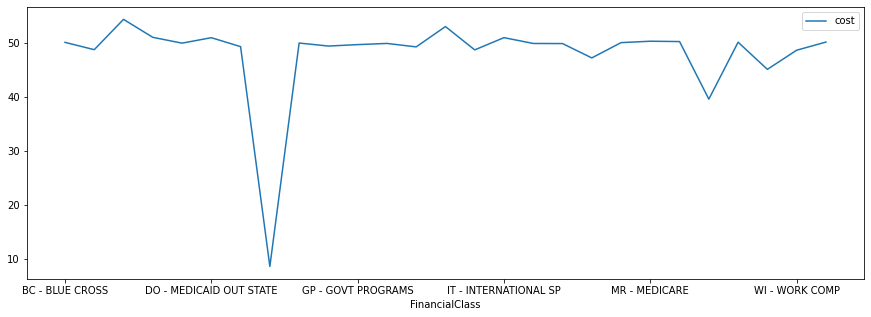

In [28]:
p51.plot(figsize=(15,5))

<div align='right'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>

## <a name='5_2'>5.2 export data</a>

In [29]:
# p51.to_csv('test_dataset.csv', index=False)

# Supplemental reading

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html

<div align='center'><a href='#toc' style='text-decoration:none;font-weight:bold;color:#0877ff;'>&#11014;&#65039; Back to the Top</a></div>